In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
week_max = 2
data = [(0, 18), (1, 11), (2, 15),(8, 10)]
columns = ['day', 'count']

In [3]:
df = pd.DataFrame(data, columns=columns)
print(df)

   day  count
0    0     18
1    1     11
2    2     15
3    8     10


In [27]:
idx = pd.date_range('2023-01-01', end='2023-01-14', freq='D')
print(idx)

DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-14'],
              dtype='datetime64[ns]', freq='D')


In [48]:
print(np.linspace(0,week_max*7-1,week_max*7))
df1 = df.reindex(df.index.union(np.linspace(0,week_max*7-1,week_max*7)))
df1.interpolate(method='linear', inplace=True)
print(df1)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13.]
      day  count
0.0   0.0   32.0
1.0   1.0   11.0
2.0   2.0   30.0
3.0   8.0   15.0
4.0   8.0   15.0
5.0   8.0   15.0
6.0   8.0   15.0
7.0   8.0   15.0
8.0   8.0   15.0
9.0   8.0   15.0
10.0  8.0   15.0
11.0  8.0   15.0
12.0  8.0   15.0
13.0  8.0   15.0


In [4]:
day_list = [0,8]
# day_list = pd.to_datetime(day_list, unit='D', origin=pd.Timestamp('2023-01-01')).to_series()
day_list = pd.DataFrame(day_list,columns=['day'])
day_list['date'] = pd.to_datetime(day_list['day'], unit='D', origin='2023-01-01')
day_list = day_list.set_index('date').resample('D').asfreq()
day_list['day'] = day_list['day'].interpolate(method='linear', limit_direction='both').astype(int)
# day_list['date'] = day_list['date'].interpolate(method='linear')
print(day_list)
print(day_list.index)

            day
date           
2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09'],
              dtype='datetime64[ns]', name='date', freq='D')


In [5]:
# df['date'] = pd.to_datetime(df['day'], unit='D', origin='2023-01-01')  # Assuming 2023-01-01 is the start date
df['date'] = day_list.index[df['day']]
print(df)

   day  count       date
0    0     18 2023-01-01
1    1     11 2023-01-02
2    2     15 2023-01-03
3    8     10 2023-01-09


In [6]:

# Resample the DataFrame with daily frequency
daily_df = df.set_index('date').resample('D').asfreq()

# Interpolate the 'count' column
daily_df['day'] = daily_df['day'].interpolate(method='linear', limit_direction='both').astype(int)
daily_df['count'] = daily_df['count'].interpolate(method='spline', order=1).astype(int)
print(daily_df)

            day  count
date                  
2023-01-01    0     18
2023-01-02    1     11
2023-01-03    2     15
2023-01-04    3     13
2023-01-05    4     12
2023-01-06    5     12
2023-01-07    6     11
2023-01-08    7     10
2023-01-09    8     10


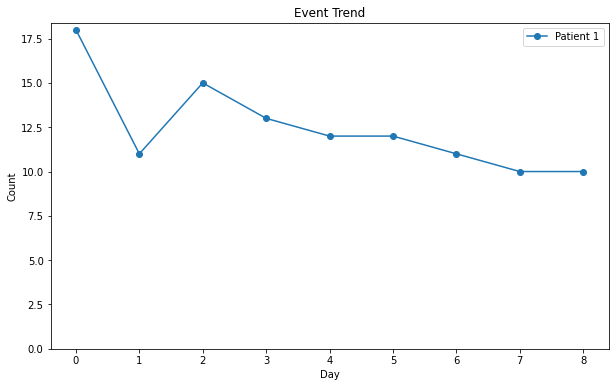

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(daily_df['day'], daily_df['count'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Count')
plt.ylim(ymin=0)
plt.title('Event Trend')
plt.legend(['Patient 1'])
# plt.grid(True)
plt.show()

In [16]:
def interpolate_weeks(week_value):
    ranges = week_value
    interpolated_ranges = []
    endmin = 99999999
    startmax = 0

    for week_range in ranges:
        print(week_range)
        start, end = map(int, week_range.split('-'))
        startmax = max(start, startmax)
        endmin = min(end, endmin)
        print('startmax: ', startmax)
        print('endmin: ', endmin)

        # Interpolate between ranges
        if startmax - endmin > 1:
            for i in range(endmin + 1, startmax,2):
                interpolated_ranges.append(f"{i}-{i+1}")
        
        interpolated_ranges.append(f"{start}-{end}")

    return ', '.join(interpolated_ranges)

# Example
week_value = ['1-2', '5-6']
result = interpolate_weeks(week_value)
print(result)

1-2
startmax:  1
endmin:  2
5-6
startmax:  5
endmin:  2
1-2, 3-4, 5-6
